<a href="https://colab.research.google.com/github/TiffanyNThomas/CS4410/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the Dataset**

In [1]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
data = load_breast_cancer()

In [3]:
BCdf = pd.DataFrame(data.data,columns=data.feature_names)

## **Checking the Sample and Target Sizes**

In [4]:
BCdf['Target']=data.target

In [5]:
BCdf.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
BCdf.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
BCdf.shape

(569, 31)

## **Splitting the Data for Training and Testing**

In [8]:
x = data.data
y = data.target

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## **Training and Testing Set Sizes**

In [10]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [11]:
log_reg

LogisticRegression()

## **Predicting**

In [15]:
log_reg.score(x_test, y_test)

0.958041958041958

In [12]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [17]:
y_pred_prob=log_reg.predict_proba(x_test)
y_pred_prob

array([[2.90050698e-04, 9.99709949e-01],
       [3.04768011e-02, 9.69523199e-01],
       [1.00000000e+00, 3.01781696e-24],
       [9.99999826e-01, 1.73781377e-07],
       [2.59887973e-02, 9.74011203e-01],
       [1.00000000e+00, 3.87270223e-26],
       [7.60849334e-03, 9.92391507e-01],
       [9.99999999e-01, 6.23858637e-10],
       [5.33552582e-02, 9.46644742e-01],
       [3.07542525e-03, 9.96924575e-01],
       [1.42024906e-03, 9.98579751e-01],
       [2.54327636e-04, 9.99745672e-01],
       [6.66798517e-03, 9.93332015e-01],
       [9.99904051e-01, 9.59488317e-05],
       [5.49143184e-03, 9.94508568e-01],
       [9.84951393e-01, 1.50486069e-02],
       [3.16727071e-02, 9.68327293e-01],
       [3.93446441e-02, 9.60655356e-01],
       [3.88839349e-03, 9.96111607e-01],
       [7.30770765e-03, 9.92692292e-01],
       [1.43695873e-01, 8.56304127e-01],
       [7.83127776e-03, 9.92168722e-01],
       [9.99953361e-01, 4.66391871e-05],
       [8.39160102e-04, 9.99160840e-01],
       [1.525962

## **Estimator Method score**

In [13]:
log_reg.score(x_test, y_test)

0.958041958041958

## **Confusion Matrix**

In [14]:
confusion_matrix(y_test, y_pred)

array([[47,  5],
       [ 1, 90]])

# **Classification Report**

In [20]:
from sklearn.metrics import classification_report

In [21]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.90      0.94        52\n           1       0.95      0.99      0.97        91\n\n    accuracy                           0.96       143\n   macro avg       0.96      0.95      0.95       143\nweighted avg       0.96      0.96      0.96       143\n'

# **Visualizing the Confusion Matrix**

In [26]:
from sklearn import metrics
import seaborn as sns

In [32]:
CM = confusion_matrix (y_test, y_pred)

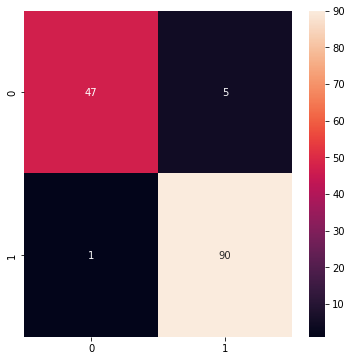

In [33]:
plt.figure(figsize=(6,6))
sns.heatmap(CM, annot=True)

## **K-Fold Cross-Validation**

In [35]:
from sklearn.model_selection import KFold

In [36]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=nb, x=load_breast_cancer.data, y=load_breast_cancer.target, cv=kfold)

NameError: ignored